# Import libraries 

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
import keras_tuner as kt
import random

# Import data

In [23]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/sign_mnist_train.csv
data/sign_mnist_test.csv
data/amer_sign2.png
data/american_sign_language.PNG
data/amer_sign3.png
data/sign_mnist_train/sign_mnist_train.csv
data/sign_mnist_test/sign_mnist_test.csv


In [96]:
train = pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [97]:
test = pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [98]:
y_train = train['label']
y_test = test['label']
X_train = train.drop('label',axis=1)
X_test = test.drop('label', axis=1)

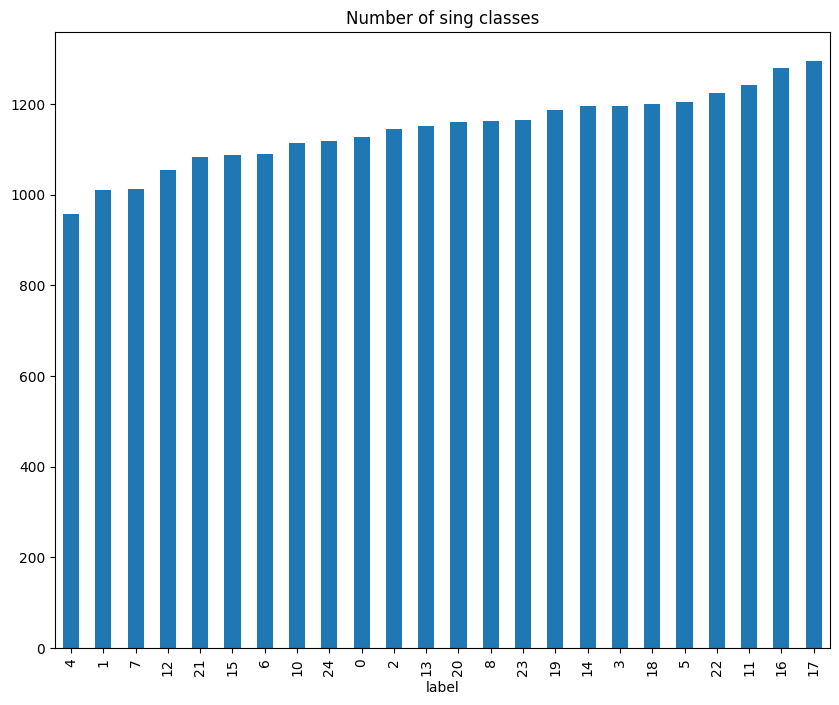

label
4      957
1     1010
7     1013
12    1055
21    1082
15    1088
6     1090
10    1114
24    1118
0     1126
2     1144
13    1151
20    1161
8     1162
23    1164
19    1186
14    1196
3     1196
18    1199
5     1204
22    1225
11    1241
16    1279
17    1294
Name: count, dtype: int64

In [99]:
plt.figure(figsize=(10,8))
y_train.value_counts().sort_values().plot(kind='bar')
plt.title('Number of sing classes')
plt.show()
y_train.value_counts().sort_values()

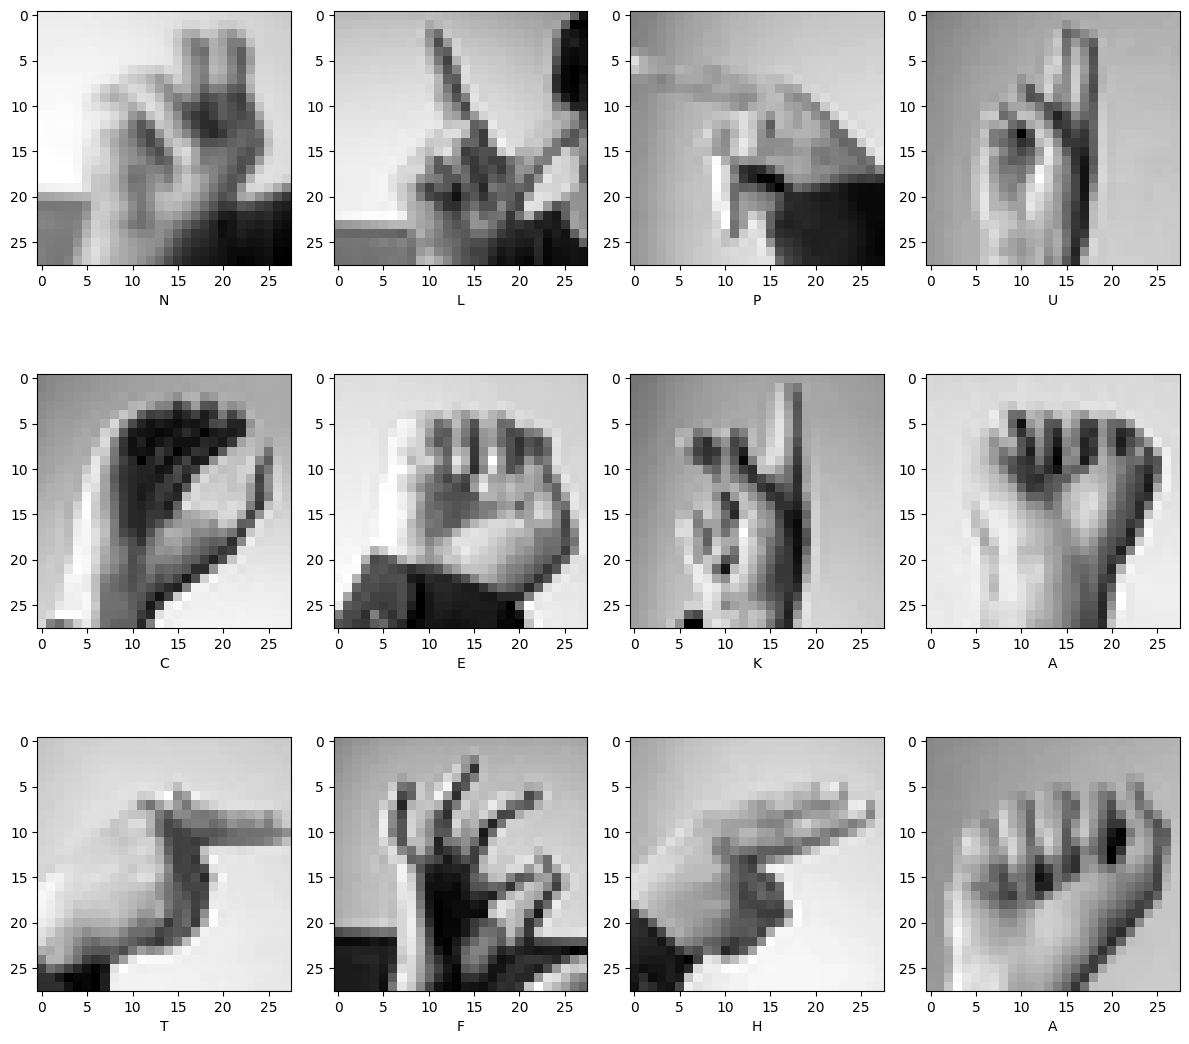

In [100]:
fig, ax = plt.subplots(3,4)
fig.set_size_inches(12,12)

l = 39
for i in range(3):
    for j in range(4):
        img = X_train.iloc[l].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(y_train[l]+65))
        ax[i,j].imshow(img,cmap='gray')
        l += 1
    plt.tight_layout()

# Preprocessing

In [101]:
X_train.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202


In [102]:
X_train = X_train/255.0
X_test = X_test/255.0

In [103]:
X_train.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.52549,0.545098,0.560784,0.572549,0.588235,0.6,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.8,0.796078,0.792157


In [104]:
X_train.shape

(27455, 784)

In [105]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [106]:
X_train.shape,X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [114]:
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,
                                               test_size=0.15,
                                               random_state=23)
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

X_train: (19835, 28, 28, 1)
X_val: (3501, 28, 28, 1)
y_train: (19835, 24)
y_val: (3501, 24)


# Data Augmentation

In [117]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Build neutral network

## Keras tuner

In [133]:
def model_builder(hp):
    model = Sequential()
    
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=16, max_value=1024, step=8)
    hp_layer_2 = hp.Int('layer_2', min_value=16, max_value=1024, step=8)
    hp_layer_3 = hp.Int('layer_3', min_value=16, max_value=1024, step=8)
    hp_layer_4 = hp.Int('layer_4', min_value=16, max_value=1024, step=8)
    hp_drop_1 = hp.Float('dropout_1', min_value=0, max_value=0.5, step=0.1)
    hp_drop_2 = hp.Float('dropout_2', min_value=0, max_value=0.5, step=0.1)
    hp_drop_3 = hp.Float('dropout_3', min_value=0, max_value=0.5, step=0.1)
    hp_drop_4 = hp.Float('dropout_4', min_value=0, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    
    model.add(Conv2D(filters=hp_layer_1,kernel_size=(3,3),padding='Same', activation=hp_activation, input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(hp_drop_1))
    model.add(Conv2D(filters=hp_layer_2,kernel_size=(3,3),padding='Same', activation=hp_activation))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(hp_drop_2))
    model.add(Conv2D(filters=hp_layer_3,kernel_size=(3,3),padding='Same', activation=hp_activation))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(hp_drop_3))
    model.add(Flatten())
    model.add(Dense(hp_layer_4, activation=hp_activation))
    model.add(Dropout(hp_drop_4))
    model.add(Dense(24,activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
              
    return model

In [134]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     directory='tuner',
                     project_name='sign')

Reloading Tuner from tuner/sign/tuner0.json


In [135]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [137]:
tuner.search(X_train,y_train,
            epochs=50,
            validation_data=(X_val,y_val),
            callbacks=[stop_early])

Trial 26 Complete [00h 00m 56s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 17m 56s


In [138]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

## Model

In [ ]:
model = tuner.hypermodel.build(best_hps)

In [140]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 168)       1680      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 168)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 168)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 888)       1343544   
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 888)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 888)        

In [142]:
history = model.fit_generator(datagen.flow(X_train,y_train,
                                          batch_size=128), 
                              epochs=50,
                             validation_data=(X_val,y_val),
                             callbacks=[stop_early])

Epoch 1/50


/tmp/ipykernel_15032/242953673.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train,


155/155 [==============================] - 3s 20ms/step - loss: 0.4890 - accuracy: 0.8337 - val_loss: 0.0813 - val_accuracy: 0.9840
Epoch 2/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4689 - accuracy: 0.8408 - val_loss: 0.0972 - val_accuracy: 0.9746
Epoch 3/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4655 - accuracy: 0.8428 - val_loss: 0.0725 - val_accuracy: 0.9874
Epoch 4/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4435 - accuracy: 0.8510 - val_loss: 0.0917 - val_accuracy: 0.9806
Epoch 5/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4194 - accuracy: 0.8570 - val_loss: 0.0596 - val_accuracy: 0.9886
Epoch 6/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4173 - accuracy: 0.8593 - val_loss: 0.0941 - val_accuracy: 0.9763
Epoch 7/50
155/155 [==============================] - 3s 20ms/step - loss: 0.4007 - accuracy: 0.8635 - val_loss: 0.0566 - val_accuracy: 0.9874
Epoch 8/50

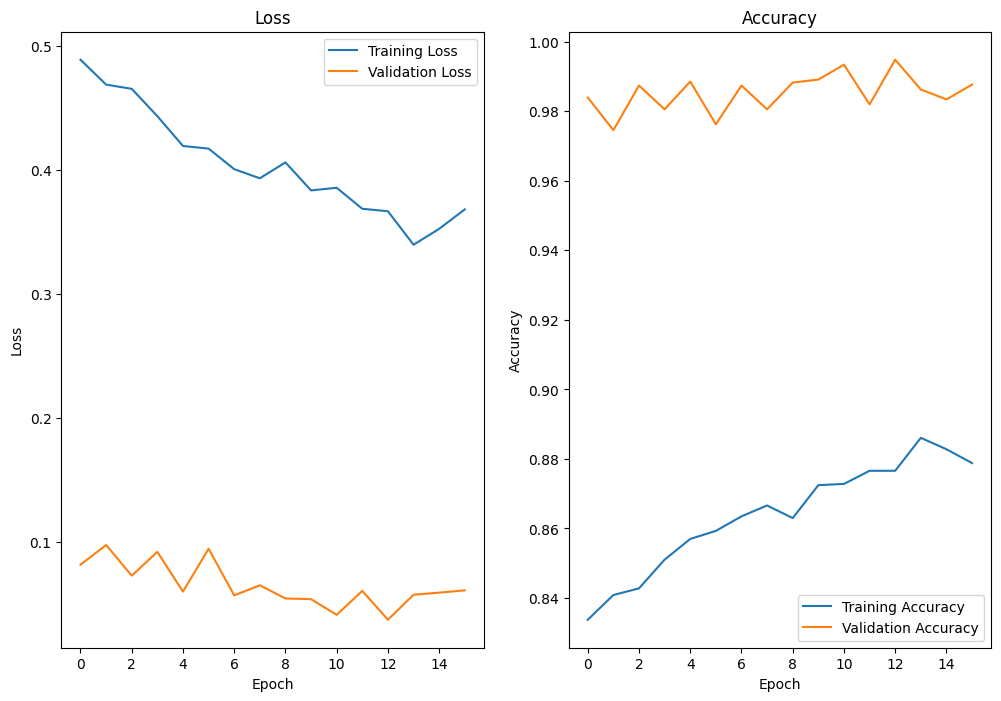

In [146]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

# Evaluate

## Val data

In [143]:
model.evaluate(X_val,y_val)

110/110 [==============================] - 1s 5ms/step - loss: 0.0606 - accuracy: 0.9877


[0.060579702258110046, 0.9877178072929382]

110/110 [==============================] - 0s 4ms/step


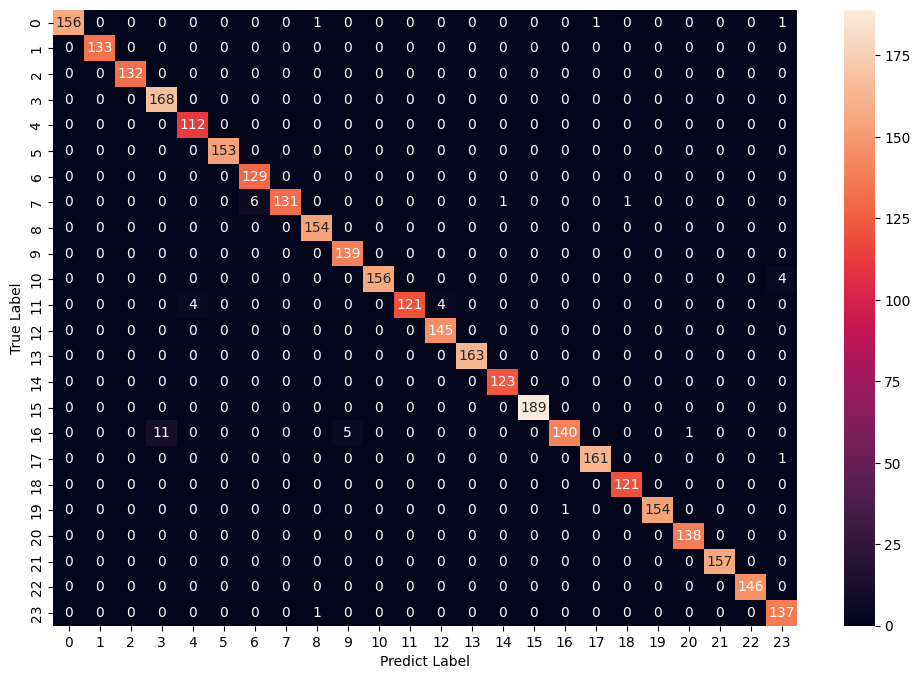

In [157]:
y_pred = model.predict(X_val)
y_preds = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
confusion = confusion_matrix(y_true,y_preds)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel('Predict Label')
plt.ylabel("True Label");

## Test data

In [147]:
y_test = label_binrizer.transform(y_test)

In [148]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.0896 - accuracy: 0.9755


[0.08956239372491837, 0.9754601120948792]

225/225 [==============================] - 1s 3ms/step


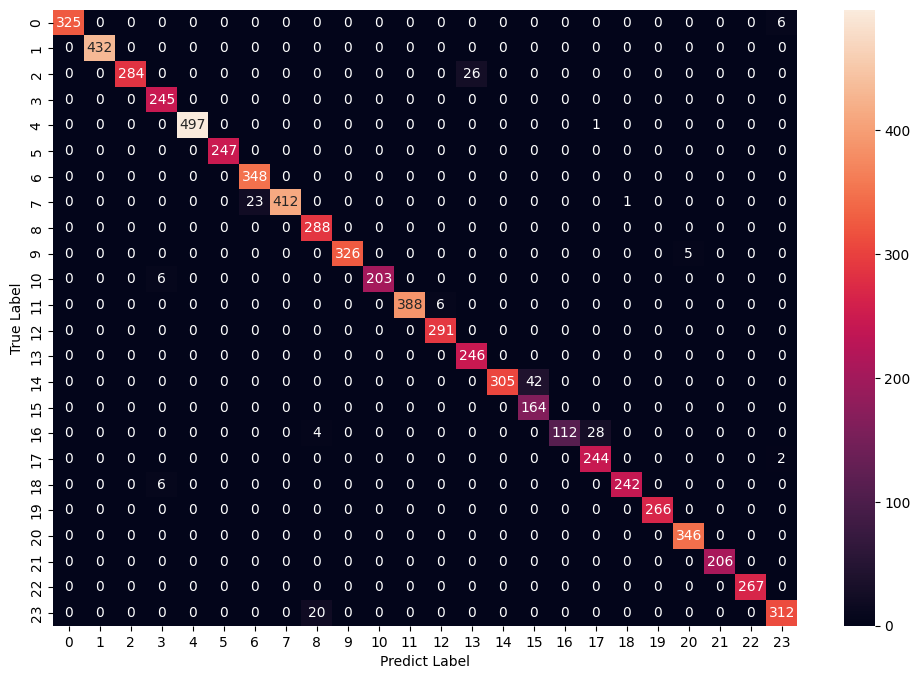

In [159]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y_true,y_preds)
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.xlabel('Predict Label')
plt.ylabel("True Label");

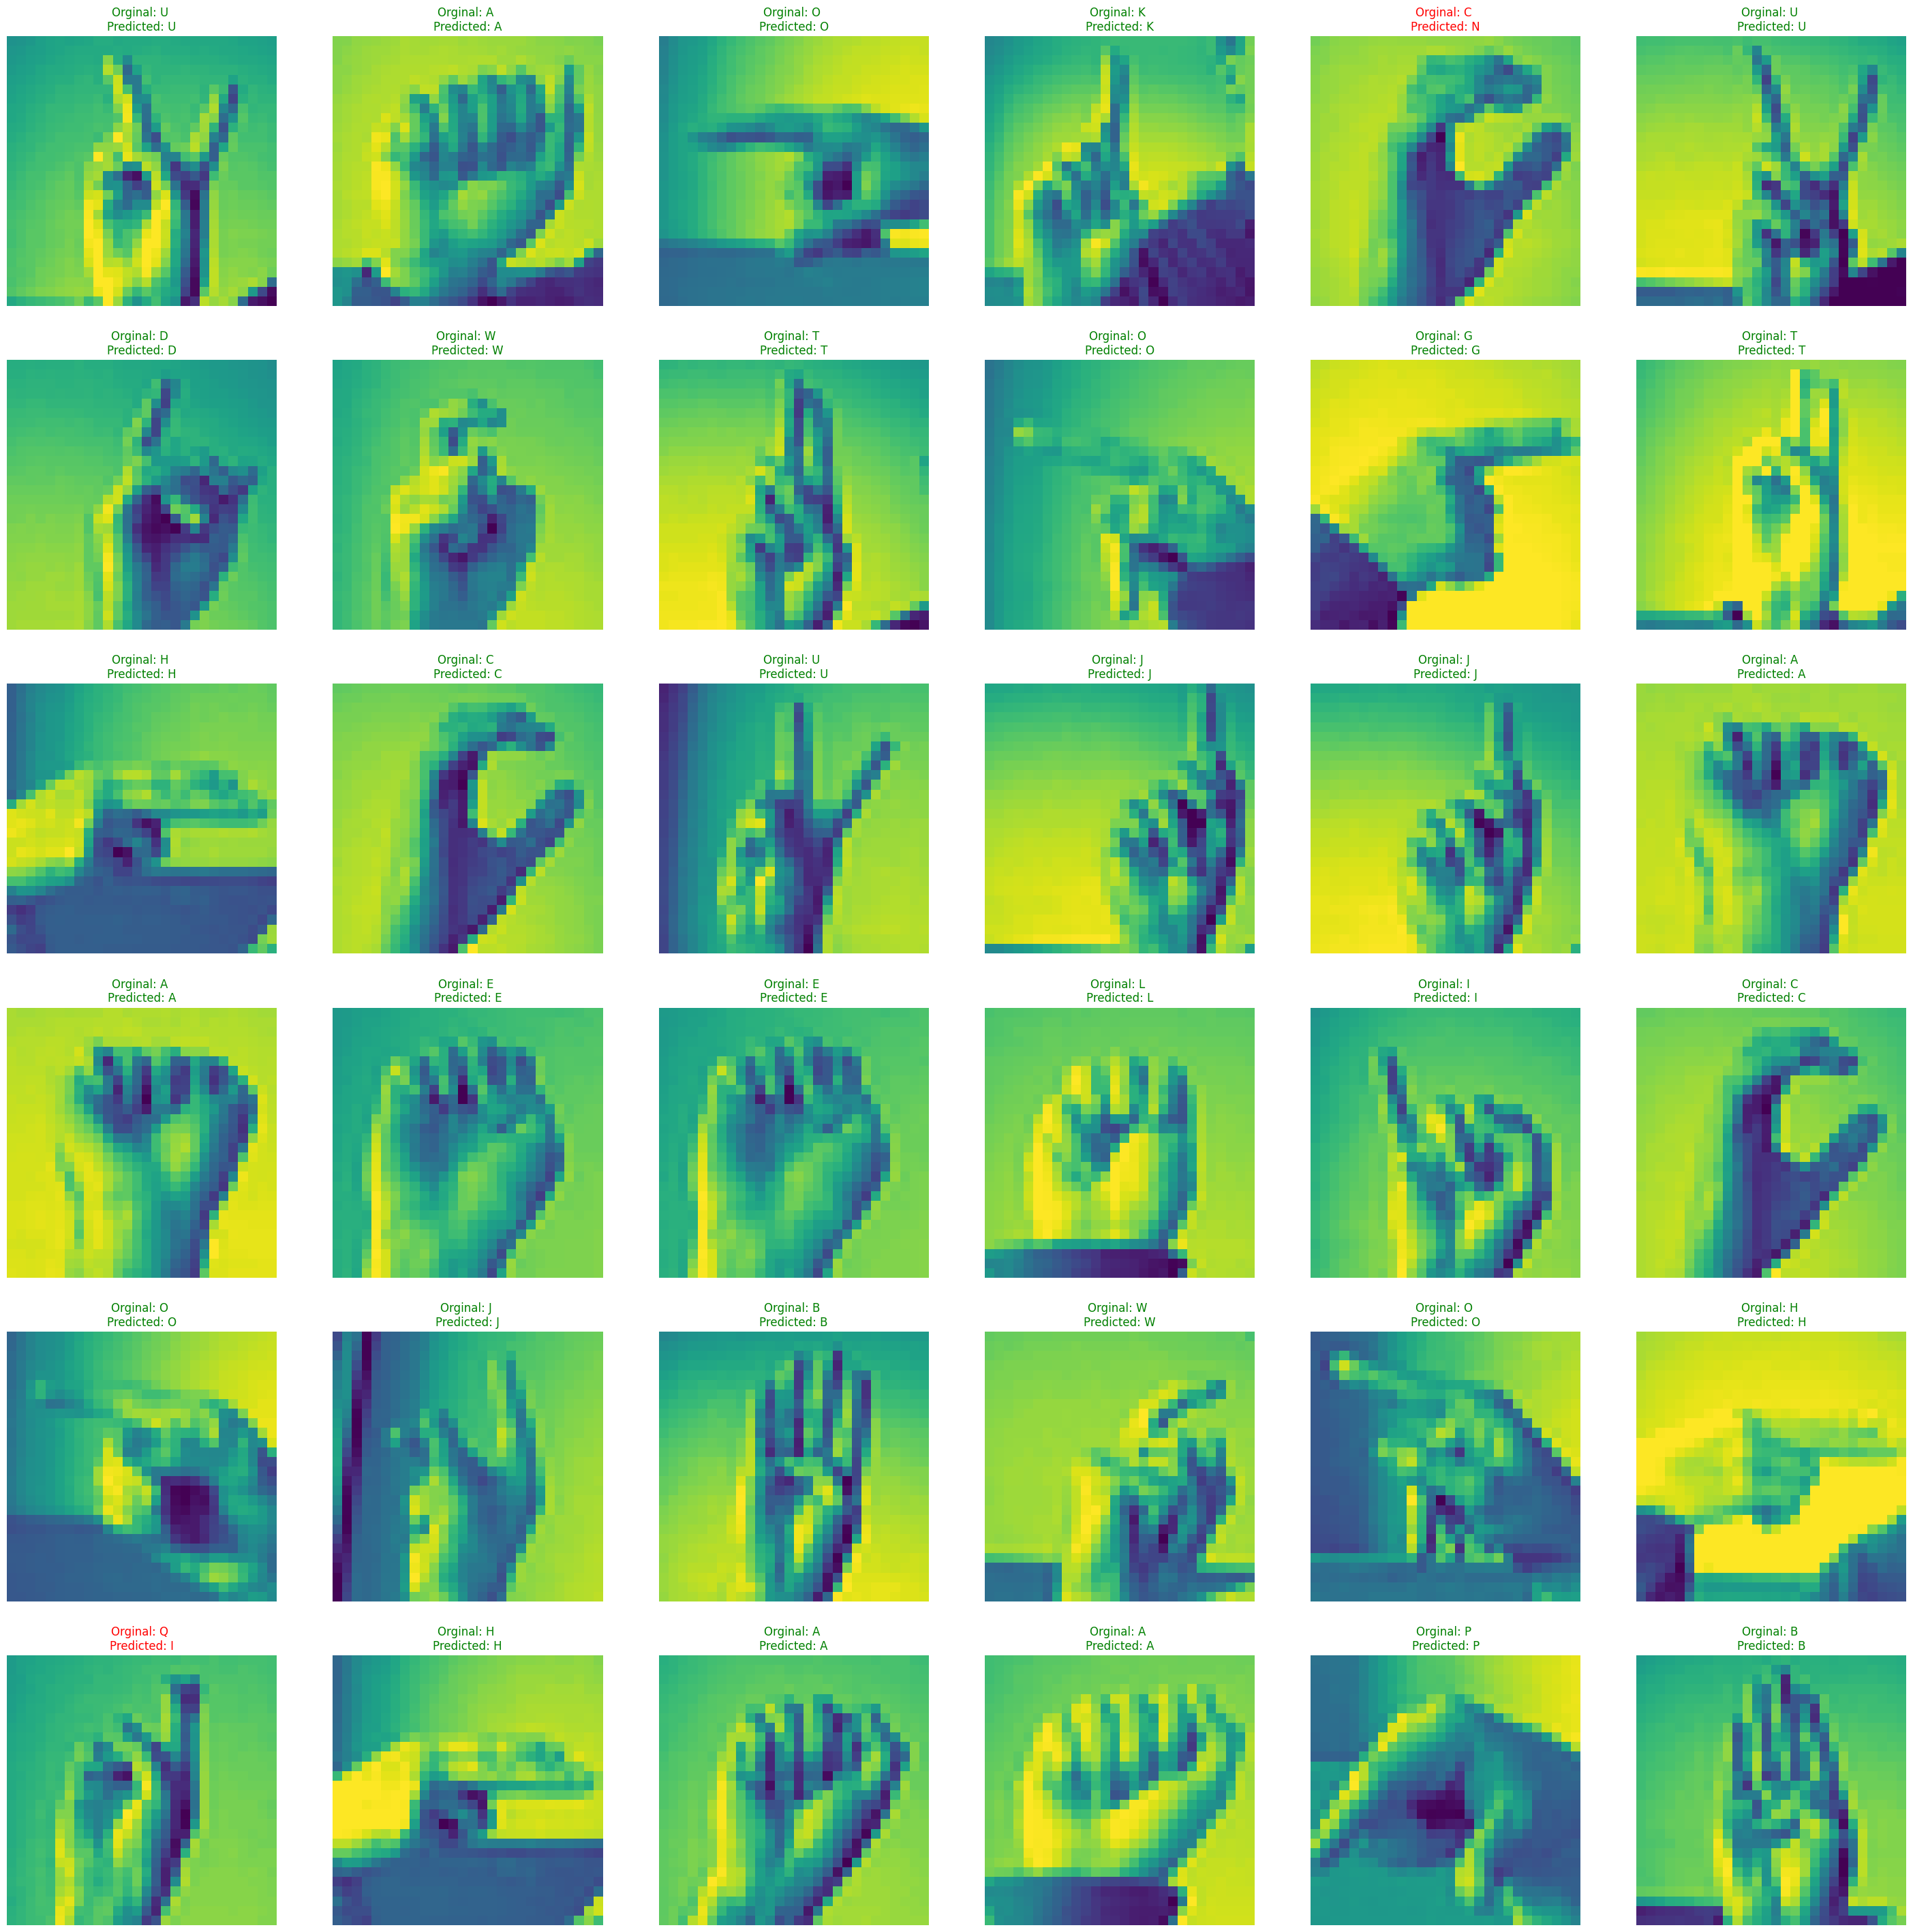

In [173]:
random_indices = random.sample(range(len(X_test)), 36)

plt.figure(figsize=(36,36))
for i, index in enumerate(random_indices):
    plt.subplot(6, 6, i + 1)
    plt.imshow(X_test[index])
    if y_preds[index] == y_true[index]:
        title_color = 'green'
    else:
        title_color = 'red'
    plt.title(f"Orginal: {chr(y_true[index]+65)} \nPredicted: {chr(y_preds[index]+65)}", color=title_color)
    plt.axis('off')

# Saving model

In [180]:
model.save('models/model.keras')

In [177]:
model.save_weights('Weights')